### **Applied Statistics Project, Winter 2024**

**by Nur Bujang**

project.ipynb
***

# Title: Analysis of Plantgrowth Data Set

### Project Description

Complete the project in a single notebook called `project.ipynb` in your repository.
The same style should be used as detailed above: explanations in MarkDown and code comments, clean code, and regular commits.
Use plots as appropriate.

In this project, you will analyze the [PlantGrowth R dataset](https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv).
You will find [a short description](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html) of it on [Vicent Arel-Bundock's Rdatasets page](https://vincentarelbundock.github.io/Rdatasets/).
The dataset contains two main variables, a treatment group and the weight of plants within those groups.

1. Download and save the dataset to your repository.

2. Describe the data set in your notebook.

3. Describe what a t-test is, how it works, and what the assumptions are.

4. Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.


### Abstract

In this project, the PlantGrowth R data set was analysed. A histogram and box plot were generated for data visualisation. The different types of t-tests and assumptions were discussed. The ctrl, trt1, and trt2 variances are equal. There is no evidence to suggest that data is not normally distributed in trt1, trt2, and ctrl. There is evidence to conclude that trt1 and trt2 means are not equal from the two-tailed Independent Two-Sample t-test. There is also evidence to conclude that there is a difference in means between ctrl, trt1, and trt2 in One-way ANOVA. Following the significant result, Tukey's HSD test was performed as a post hoc test and concluded that trt1 and trt2 have significantly different means.

### 1.0 Plan

1. Download and save dataset
    - import pandas as pd , import numpy as np
    - url, df=pd.read_csv, df.to_csv
    - df.head, df.tail

2. Describe the data set
    - df.info, df.describe

3. Describe t-test, assumptions
    - check for normality (qq, shapiro), equal variance (levene? bartlett), equal sample size, independence

4. t-test for trt1 and trt2
    - Set null and alternative hypothesis
    - alpha
    - import numpy as np, from scipy import stats
    - separate group into trt1, trt2, crtl
    - ttest_ind
    - if statement to compare pval with alpha

5. ANOVA for crtl, trt1, trt2 - assumptions
    - Set null and alternative hypothesis
    - alpha, crtl
    - fstat,fpval = stats.f_oneway(crtl, trt1, trt2)
    - if statement compare pval with alpha

6. Why, for > 2 groups, ANOVA is more appropriate?

### 2.0 Methods and Implementation

### 2.1 Download and save dataset

The plantgrowth.csv dataset <a href="https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv">(Arel-Bundock, n.d.)</a> was retrieved from <a href="https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html">(Arel-Bundock, n.d.)</a>. Because the columns were separated by commas, pandas.read_csv was performed to read the values into a data frame <a href="https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html">(Pandas, n.d.)</a>. Later, the csv file was saved into the data folder using df.to_csv <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html">(Pandas, n.d.)</a>. 

To ensure that the csv file was saved properly, df.head <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html">(Pandas, n.d.)</a> and df.tail <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html">(Pandas, n.d.)</a> were performed to look at the first and last five lines of the dataset. 

In [93]:
# import libraries
import pandas as pd # data frames
import numpy as np # numerical arrays
import seaborn as sns # plotting
import matplotlib.pyplot as plt # plotting
import scipy.stats as stats # statistical functions
from scipy.stats import levene # levene's test statistical function
from scipy.stats import ttest_ind # independent t-test statistical function

In [94]:
url = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/PlantGrowth.csv"
df=pd.read_csv(url)
df.to_csv("data/plantgrowth.csv", index=False) # saved as plantgrowth.csv in data folder
df.head() # look at the first 5 lines

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl


In [95]:
df.tail() # look at the last 5 lines

,rownames,weight,group
25,26,5.29,trt2
26,27,4.92,trt2
27,28,6.15,trt2
28,29,5.80,trt2
29,30,5.26,trt2


### 2.2 Describe the data set

To describe the basic information of the dataset, df.info <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html">(The Pandas Development Team, 2022)</a> was generated. 

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  30 non-null     int64  
 1   weight    30 non-null     float64
 2   group     30 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


This dataset compares plant dried weight from a plant growth experiment subjected under ctrl, trt1, and trt2 conditions. It contains 30 instances in three columns, which are rownames, weight, and group.

Column rownames is a 64-bit integer type of whole numbers (without decimal points) with no missing values. These seem to be row labels only and will be omitted from the statistical analysis.

Column weight is a 64-bit floating-point numbers data type, which contains decimal points. Even if the column contains both integers and floats, the column will assign it as floats to retain the decimal values <a href="https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format.html">(Gosset and Wright, 2017)</a>. Weight is a continuous numerical data, which is a type of quantitative data and can contain any number of measurements between two points <a href="https://www.g2.com/articles/discrete-vs-continuous-data#what-is-continuous-data">(Zangre, 2024)</a>. This column has no missing values. Pandas default to float if there are missing values in case they have decimals <a href="https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format.html">(Gosset and Wright, 2017)</a>. In this dataset, weight contains the dried weight of plants in grams.

Column group is of type object, without missing values. The object data type is often used for text or nominal categorical data type but can represent any data type, including strings, lists, integers, or custom objects <a href="https://numpy.org/devdocs/reference/arrays.dtypes.html">(NumPy Developers, n.d.)</a>. Nominal categorical data is a type of qualitative categorical data that represents categories without specific ranking or order among them <a href="https://www.statisticssolutions.com/levels-of-measurement/">(Statistics Solutions, 2017)</a>. In this dataset, column group contains labels that represent three different conditions, which are ctrl, trt1, and trt2.

In [97]:
# drop column rownames because they are just labels
df.drop(columns=['rownames'], inplace=True)

# describe dataset
df.describe()

# OR
# exclude rownames because they are just labels
#df.iloc[:, 1:].describe() # select all rows, column 1 onwards

,weight
count,30.000000
mean,5.073000
std,0.701192
min,3.590000
25%,4.550000
50%,5.155000
75%,5.530000
max,6.310000


The dataset plantgrowth.csv is a complete dataset. 'Count' shows that column weight contains 30 non-null (non-missing) values in 30 rows.

Mean or average value is calculated by totaling the sum of all values and dividing it by the count, which pinpoints the general central location within the dataset <a href="https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php">(Laerd Statistics, 2018)</a>. However, outliers can distort the mean, thus misrepresenting the average of the data <a href="https://www.speedcommerce.com/what-is/outlier/">(Speed Commerce, 2023)</a>. The mean for weight is 5.073.

Std (standard deviation) measures the dispersion of the data around the mean <a href="https://www.nlm.nih.gov/oet/ed/stats/02-900.html">(National Library of Medicine, 2012)</a>. A low standard deviation indicates that the data is concentrated closely around the mean, and a high value indicates that the values are spread farther away from the mean <a href="https://en.wikipedia.org/wiki/Standard_deviation">(Wikipedia Contributors, 2019)</a>. From the dataset, column weight is concentrated around the mean.

Min is the smallest value in the dataset, however, if the value is extremely low, it could be an outlier <a href="https://study.com/academy/lesson/maximums-minimums-outliers-in-a-data-set-lesson-quiz.html">(Cowley, 2021)</a>. The min for weight is 3.590.

Quartiles split sorted data into four equal parts which provide an insight into the middle point and spread of the data, whether it is symmetrical or skewed and the presence of outliers <a href="https://en.wikipedia.org/wiki/Quartile">(Wikipedia, 2021)</a>. If the lower quartile is farther from the median than the upper quartile, the distribution is negatively/left skewed with a longer left tail <a href="https://corporatefinanceinstitute.com/resources/data-science/negatively-skewed-distribution/">(Taylor, 2022a)</a>. A positively/right-skewed distribution with a longer right tail occurs when <a href="https://corporatefinanceinstitute.com/resources/data-science/positively-skewed-distribution/">(Taylor, 2022b)</a>.

25th percentile or first quartile describes the spread of the lower section of the dataset. For column weight, 25% of the data is below 4.55 while the higher 75% data is above 4.55. The distance between the lower quartile and the median (0.605) is higher than the distance between the upper quartile and the median (0.375), suggesting a negatively-skewed (left-skewed) distribution for column weight.

50th percentile/second quartile/median divides the sorted dataset into two equal portions (lower and upper) <a href="https://en.wikipedia.org/wiki/Median">(Wikipedia, 2020)</a>. Half of the dataset in column weight is lower than 5.155.

75th percentile or third quartile describes the upper segment of the dataset. 75% of the data for column weight is below 5.53 while the rest (higher 25%) are above 5.53.

Finally, max is the biggest value in the data, which could be an outlier if the value is exceptionally high <a href="https://study.com/academy/lesson/maximums-minimums-outliers-in-a-data-set-lesson-quiz.html">(Cowley, 2021)</a>. The max weight is 6.310. 

### 2.3 Describe what a t-test is, how it works, and what the assumptions are

### 2.3.1 T-test

A Student's t-test is a statistical analysis used to compare the means of two groups to see if they are significantly different from each other <a href="https://en.wikipedia.org/wiki/Student%27s_t-test">Wikipedia Contributors (2019c)</a>. The t-test is performed when data is limited (small sample size, n < 30) and assumed to have a normal distribution <a href="https://www.datacamp.com/tutorial/t-test-vs-z-test">(Thevapalan, 2024)</a>. It is used in hypothesis testing where the test statistic follows a t-distribution, which resembles the standard normal distribution (bell-shaped and symmetrical) but with heavier tails <a href="https://en.wikipedia.org/wiki/Student%27s_t-distribution">Wikipedia Contributors (2019b)</a>. The heavier tails account for the variability in small samples against the unknown population variance <a href="https://www.datacamp.com/tutorial/t-test-vs-z-test">(Thevapalan, 2024)</a>.

According to <a href="https://en.wikipedia.org/wiki/Student%27s_t-test">Wikipedia Contributors (2019c)</a>, there are One-sample t-test, Independent (Unpaired) Two-sample t-test and Paired (Dependent) two-sample t-test. 

One-sample t-test compares the mean of a single sample to a known value or hypothesized population mean, assessing whether the sample mean statistically and significantly deviates from the reference value or is equal to that standard, while taking into account the variability within the sample <a href="https://www.graphpad.com/quickcalcs/onesamplet1/">(GraphPad, n.d.)</a>. The assumption for one-sample t-test is that the sample mean follows a normal distribution <a href="https://en.wikipedia.org/wiki/Student%27s_t-test">Wikipedia Contributors (2019c)</a>. According to [JMP Statistical Discovery LLC (n.d.)](https://www.jmp.com/en_be/statistics-knowledge-portal/t-test/one-sample-t-test.html), the formula for one-sample t-test is: 

$$t = \frac{\bar{x} - \mu}{s / \sqrt{n}}$$

where:
- $ \bar{x} $ is the sample mean,
- $ \mu $ is the population mean,
- $ s $ is the sample standard deviation,
- $ n $ is the sample size.


Independent (Unpaired) Two-sample t-test compares the means of two independent groups that are not correlated to determine if they are significantly different from each other (alternative hypothesis) or equal (null hypothesis) <a href="https://www.graphpad.com/guides/the-ultimate-guide-to-t-tests">(GraphPad, 2024)</a>. The test statistic is calculated by dividing the difference between the two sample means by the estimated standard error <a href="https://sites.utexas.edu/sos/guided/inferential/numeric/onecat/2-groups/independent/two-sample-t/">(The University of Texas at Austin, n.d.)</a>. This standard error reflects the overall variation across both groups <a href="https://sites.utexas.edu/sos/guided/inferential/numeric/onecat/2-groups/independent/two-sample-t/">(The University of Texas at Austin, n.d.)</a>. According to [JMP Statistical Discovery LLC (n.d.)](https://www.jmp.com/en_ca/statistics-knowledge-portal/t-test/two-sample-t-test.html), the formula for t-test with unequal variance is: 

$$
t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}
$$

where:
- $ \bar{X}_1 $ and $ \bar{X}_2 $ are the sample means,
- $ s_1 $ and $ s_2 $ are the sample standard deviations,
- $ n_1 $ and $ n_2 $ are the sample sizes.

However, if the sample sizes for the two groups are the same, the pooled variance (average variance for both groups) is used. According to [JMP Statistical Discovery LLC (n.d.)](https://www.jmp.com/en_ca/statistics-knowledge-portal/t-test/two-sample-t-test.html), the formula with pooled variance is: 

$$t = \frac{\bar{X}_1 - \bar{X}_2}{s / \sqrt{n}}$$

where:
- $ \bar{X}_1 $ and $ \bar{X}_2 $ are the sample means,
- $ s $ is the pooled sample standard deviation, 
- $ n $ is the sample size. 

Paired (Dependent) two-sample t-test compares means of matched pairs or the same group at different times or conditions (repeated measures) to see if they are significantly different from each other (alternative hypothesis) or equal (null hypothesis) <a href="https://www.graphpad.com/guides/the-ultimate-guide-to-t-tests">(GraphPad, 2024)</a>. In this test, the same subjects must be present in both groups (fully paired) [(Wikipedia Contributors, 2019l)](https://en.wikipedia.org/wiki/Student%27s_t-test). Nothing should happen in the time delay between before and after except the intervention <a href="https://github.com/ianmcloughlin/2425_applied_statistics">(McLoughlin, 2024)</a>. Paired t-test is better in avoiding type II error (false negative) compared to Independent two-sample t-test <a href="https://en.wikipedia.org/wiki/Student%27s_t-test">Wikipedia Contributors (2019c)</a>. The mean difference between two related groups is calculated by first computing the difference for each pair, then evaluating whether the average difference is statistically and significantly different from zero while taking into account the variability of the differences across pairs <a href="https://en.wikipedia.org/wiki/P-value">Wikipedia Contributors (2019a)</a>. According to [JMP Statistical Discovery LLC (n.d.)](https://www.jmp.com/en_us/statistics-knowledge-portal/t-test/paired-t-test.html), the formula for paired t-test is: 

$$t = \frac{\mu_d}{s_d / \sqrt{n}}$$

where:
- $ \mu_d $ is the mean of the differences between paired observations,
- $ s_d $ is the standard deviation of the differences,
- $ n\ $ is the number of pairs (sample size).

### 2.3.2 How does a t-test work?

Before setting any experimental design, the right questions have to be specified. Then, the hypotheses were stated. The null hypothesis assumes that the two group means are equal ($ \mu_1 = \mu_2 $). The alternative hypothesis assumes that the two group means are not equal ($ \mu_1 \neq \mu_2 $).

The $\alpha$ or confidence level is determined before data collection and analysis [(Tenny and Abdelgawad, 2023)](https://www.ncbi.nlm.nih.gov/books/NBK459346/). The $\alpha$ level is a threshold that determines the significance level of a test, which is the probability of rejecting the null hypothesis when the null hypothesis is true <a href="https://en.wikipedia.org/wiki/Statistical_significance">Wikipedia Contributors (2019c)</a>. 

The decision to use a one-tailed or two-tailed test should be made before collecting or analyzing the data. One-tailed can be used if the question asked has a specific direction, such as 'more than' or 'less than' [(David, 2017)](https://www.statisticssolutions.com/should-you-use-a-one-tailed-test-or-a-two-tailed-test-for-your-data-analysis/). At the same $\alpha$ level, it has more statistical power than the two-tailed test [(David, 2017)](https://www.statisticssolutions.com/should-you-use-a-one-tailed-test-or-a-two-tailed-test-for-your-data-analysis/). Otherwise, if the question is only interested in whether there is a difference between means, a two-tailed test is used. 

Then, one has to check whether all assumptions are satisfied. A Student's t-test is appropriate to use when the sample size is around 30, while a larger sample size should use a z-test [(King and Eckersley, 2019)](https://www.sciencedirect.com/science/article/abs/pii/B9780081029398000141?via%3Dihub). One could test for equal variance using Levene's test [(Wikipedia Contributors, 2019d)](https://en.wikipedia.org/wiki/Levene%27s_test) or Bartlett's test [(Wikipedia, 2020b)](https://en.wikipedia.org/wiki/F-test_of_equality_of_variances). Histograms, Q-Q plots, or Shapiro-Wilk Test [(Wikipedia Contributors, 2019g)](https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test) could be used to test for normality. 

After that, the appropriate t-statistic can be calculated depending on the data. The degrees of freedom, which is the number of values that can vary in an analysis could be also determined [(Wikipedia Contributors, 2019c)](https://en.wikipedia.org/wiki/Degrees_of_freedom_(statistics)). Because the number of parameters we can estimate is restricted by available data, it is calculated by subtracting the number of parameters or relationships from the sample size <a href="https://statisticsbyjim.com/hypothesis-testing/degrees-freedom-statistics/">(Frost, 2017)</a>. 

After the t-statistic and $p$-value (critical Value) were obtained from the t-test, the decision to reject the null hypothesis or otherwise can be made by comparing the $p$-value to the significance level, $\alpha$. $p$-value is the likelihood of getting observed data when the null hypothesis is true <a href="https://en.wikipedia.org/wiki/P-value">Wikipedia Contributors (2019a)</a>. If $p \leq \alpha$, we reject the null hypothesis, thus concluding that there is a significant difference. If $p > \alpha$, we fail to reject the null hypothesis.

### 2.3.3 Assumptions

The assumptions that need to be met before conducting a Student's t-test are continuous data, simple random extraction/sampling (One-Sample t-test), equal variances between groups, and that data is normally distributed [(JMP Statistical Discovery LLC, n.d.)](https://www.jmp.com/en_ca/statistics-knowledge-portal/t-test.html). According to [Maverick (2021)](https://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp), the sample size should also be considerable. For Independent Unpaired Two-Sample t-test, it is crucial to have independent observations [(Laerd Statistics, 2018b)](https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php). The same subjects must be present in both groups (fully paired) for Dependent (Paired) Two-Sample t-test [(Wikipedia Contributors, 2019l)](https://en.wikipedia.org/wiki/Student%27s_t-test). 

#### 2.3.3.1 Continuous Data

Continuous data can take on an infinite number of possible values within a given range [(Wikipedia, 2020a)](https://www.mybib.com/#/projects/JXA5Xa/citations). In programming, they are known as floating point numbers and are used to represent real numbers [(Banchio, 2022)](https://riskledger.com/resources/floating-point-numbers).

It is measured on an interval (without absolute zero) or ratio scale (with absolute zero) [(EBM Consult, LLC, n.d.)](https://www.ebmconsult.com/articles/continuous-interval-or-ratio-scale-data). Continuous data is particularly suited for t-tests because the test relies on accuracy in means calculations. The rationale for using continuous data for a t-test is it often approximates a normal distribution, which meets the t-test's normality requirement [(Curtin University Library, n.d.)](https://uniskills.library.curtin.edu.au/numeracy/statistics/normal-distribution/) and provides a valid mean and standard deviation calculation in each group. Continuous data can be visualised in histograms, box plots, and Q-Q plots.

#### 2.3.3.1.1 Histogram

First, the plant dry weight was separated into trt1, trt2, and ctrl categories using df.groupby <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html">(Pandas, n.d.)</a> where each unique values in column 'group' forms separate subgroups which includes corresponding weight values then put it into a list.

In [98]:
# Form treatment subgroups from group

dfgroup = df.groupby('group')['weight'].apply(list) # first group by treatment, then takes corresponding weight, then puts it into a list
trt1w = dfgroup['trt1']
trt2w = dfgroup['trt2']
ctrlw = dfgroup['ctrl'] 

A histogram was generated using seaborn [(Waskom, n.d.)](https://seaborn.pydata.org/generated/seaborn.histplot.html) in 1x3 grid according to matplotlib [(Hunter et al., n.d.)](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).

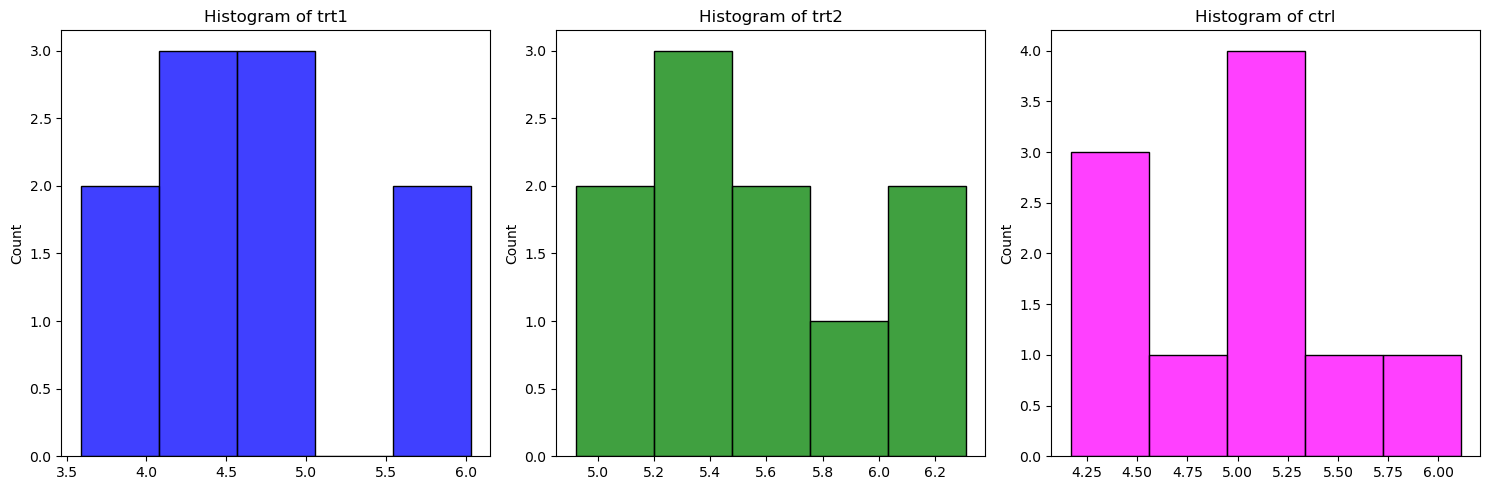

In [99]:
# Generate histogram for trt1, trt2 and ctrl

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 row x 3 columns grid

sns.histplot(trt1w, bins=5, color='blue', ax=axes[0])
axes[0].set_title('Histogram of trt1')

sns.histplot(trt2w, bins=5, color='green', ax=axes[1])
axes[1].set_title('Histogram of trt2')

sns.histplot(ctrlw, bins=5, color='magenta', ax=axes[2])
axes[2].set_title('Histogram of ctrl')

plt.tight_layout()
plt.show();

The histogram for trt1, trt2 and ctrl are not informative enough, so a box plot was necessary.

#### 2.3.3.1.2 Box Plot

A box plot was generated using pandas [(Pandas, n.d.)](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html), with the weight grouped by subgroups ctrl, trt1 and trt2.

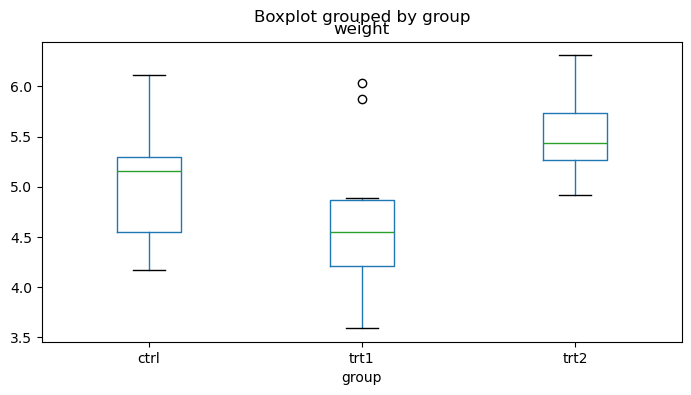

In [100]:
# Generate boxplot grouped by ctrl, trt1 and trt2
# return type both returns a namedtuple with the axes and dict  
df.boxplot(column='weight', by='group', figsize=(8,4), grid=False, return_type='both')
plt.show()

For ctrl, the lower whisker shows that 25% of the data are between 4.2 to 4.5. 50% of the data (located within the interquartile range) are between 4.5 to 5.25. The first quartile ranges from 4.5 to 5.2. The median (Q2) is 5.2. The third quartile is between 5.2 to 5.3. The upper whisker, which maximizes at 6.2 contains 25% of the upper data. It is longer than the lower, indicating that the distribution is right-skewed (positively-skewed). 

For trt1, 25% of the data ranges from 3.7 to 4.2. The interquartile range is between 4.2 to 4.75. The first quartile is between 4.2 to 4.5. The median is 4.5. The third quartile ranges between 4.5 to 4.75. The shorter upper whisker compared to the lower indicates a left-skewed (negatively-skewed) distribution. It also has some outliers beyond the upper whisker.

For trt2, 25% of the data are between 4.9 to 5.25. 50% of the data are between 5.25 to 5.75. The first quartile ranges between 5.25 to 5.4. The median is 5.4. The third quartile ranges from 5.4 to 5.75. The upper whisker, which maximizes at 6.3, is longer than the lower, indicating that the distribution is right-skewed (positively skewed). 

#### 2.3.3.2 Sample size 

The second assumption is that the sample size for both groups is of considerable size. A Student's t-test is appropriate to use when the sample size is around 30, while a larger sample size should use a z-test [(King and Eckersley, 2019)](https://www.sciencedirect.com/science/article/abs/pii/B9780081029398000141?via%3Dihub). The sample size is important because the data has to be normally distributed, which is difficult to achieve with a small sample size.

Another concern is that poor data representation by small sample sizes tends to produce less precise estimates. The standard error is also increased, which makes it harder to detect a true difference between groups (Type I and II errors), eventually leading to a reduced power of test (rejecting the null hypothesis when the alternative hypothesis is true). Standard error decreases as sample size increases [(Linkedin, 2024)](https://www.linkedin.com/advice/1/what-impact-does-sample-size-have-standard-error-mean-t0qpe). However, according to [Bobbitt (2021)](https://www.statology.org/minimum-sample-size-for-t-test/), there is no minimum sample size for a t-test. [Skaik (2015)](https://pmc.ncbi.nlm.nih.gov/articles/PMC4744321/) stated that for a sample size that is less than 15, the one-sample t-test is inappropriate if the data is skewed and contains significant outliers. A study conducted by [de Winter (2013)](https://openpublishing.library.umass.edu/pare/article/1434/galley/1385/view/) on Type I error from t-test on 5 to 15 samples found that there is no issue in using t-test on a sample size as small as n=2.

The len() function was used to find the sample size for trt1 and trt2 [(W3 Schools, n.d.)](https://www.w3schools.com/python/ref_func_len.asp). 

In [101]:
ntrt1w = len(trt1w)
ntrt2w = len(trt2w)

ntrt1w, ntrt2w

(10, 10)

Even though there are 10 samples each for trt1 and trt2, based on the study conducted by [de Winter (2013)](https://openpublishing.library.umass.edu/pare/article/1434/galley/1385/view/), t-test is still appropriate to use for statistical analysis.

#### 2.3.3.3 Homogeneity of Variance with Levene's Test

Another assumption for t-test is that variances are equal across both groups. Homogeneity of variance is important because the standard error in the denominator of the t-statistic formula relies on an assumption of equal variances. In pooled variance, when sample sizes are equal, each group contributes equally to the pooled variance, preventing one group's variance from disproportionately affecting the estimate. The group with the larger sample size will create an imbalance by dominating the pooled variance estimate.

If the variances are not equal, when pooled, the standard error, ${s / \sqrt{n}}$ will either overestimate or underestimate the true standard error. This will result in incorrect t-statistics and p-values, which in turn may lead to Type I error (rejecting a true null hypothesis) and Type II error (failing to reject a false null hypothesis) [(Wikipedia, 2021c)](https://en.wikipedia.org/wiki/Type_I_and_type_II_errors). This will decrease the power of test (the probability of detecting a true effect or correctly rejecting the null hypothesis when the alternative hypothesis is true), thus making the test unreliable [(Wikipedia Contributors, 2019f)](https://en.wikipedia.org/wiki/Power_(statistics)).

Levene's test was performed to assess homoscedasticity [(Wikipedia Contributors, 2019d)](https://en.wikipedia.org/wiki/Levene%27s_test). Levene's test is less sensitive to normality, as opposed to Bartlett's test, which is better if there is strong evidence that the data is normally distributed [(NIST, 2019)](https://www.itl.nist.gov/div898/handbook/eda/section3/eda35a.htm). Levene's test was performed using scipy.stats and imported from the library [(The SciPy community, n.d.)](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html). 

For Levene's test, the hypotheses are:

**Null Hypothesis assumes that all variances are equal <a href="https://scipy.github.io/devdocs/reference/generated/scipy.stats.shapiro.html">(The SciPy community, 2024)</a>.**

**The Alternative Hypothesis assumes that all variances are not equal.**

As the first hypothesis testing in this notebook, the significance level, $\alpha$ is determined to be 0.05. 

In [102]:
# Determine significance level, alpha
alpha = 0.05

In [103]:
# Run Levene's test for ctrl, trt1 and trt2
lvtest, lvpval = levene(ctrlw, trt1w, trt2w)

# Show test and p-value
lvtest, lvpval

(1.1191856948703909, 0.3412266241254737)

In [104]:
if lvpval < alpha:
    print("Null Hypothesis is rejected. There is evidence to conclude that all variances are not equal.")
    
else:
    print("Null Hypothesis cannot be rejected. We can continue to assume that all variances are equal.")

Null Hypothesis cannot be rejected. We can continue to assume that all variances are equal.


At significance level $\alpha$ = 0.05, the $p$-value of seeing the value as extreme as 1.11 is 34%. Therefore, because $p$-value > $\alpha$, the Null Hypothesis cannot be rejected. We continue to assume that all variances are equal.

#### 2.3.3.4 Test for Normality with Shapiro-Wilk Test

#### 2.3.3.4.1 Q-Q Plot

Before performing the Shapiro-Wilk test, a Q-Q plot was generated using matplotlib <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html">(Hunter et al., n.d.)</a> and stats.probplot <a href="https://www.statsmodels.org/stable/generated/statsmodels.graphics.gofplots.qqplot.html">(Perktold et al., 2009)</a> to form the assumption that the data is normally distributed. A Q-Q plot compares the quantiles of the data with the quantiles of a theoretical normal distribution.

The scipy.stats library was imported according to <a href="https://docs.scipy.org/doc/scipy/reference/stats.html">(The SciPy community, 2019)</a> and <a href="https://github.com/ianmcloughlin/2425_applied_statistics">McLoughlin (2024)</a>.

The significance level, $\alpha$ remains at 0.05.

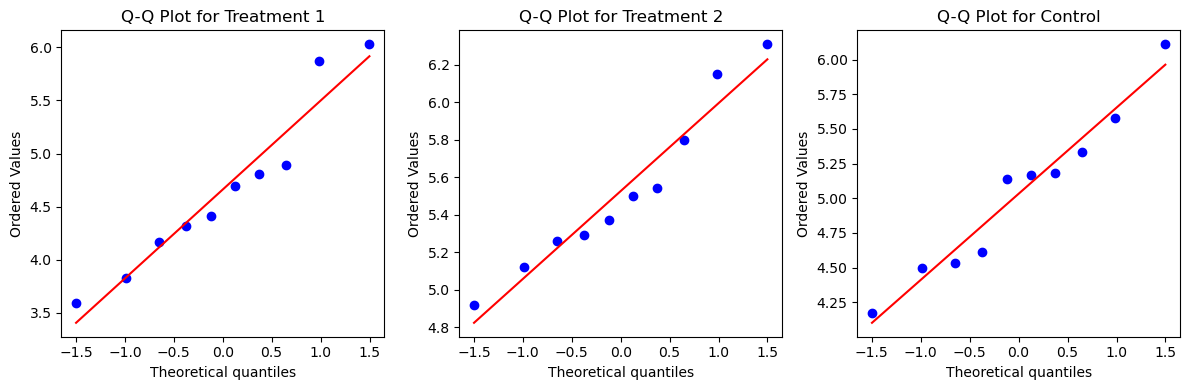

In [105]:
# Generate Q-Q plots for each group

plt.figure(figsize=(12, 4))

# Q-Q plot for trt1
plt.subplot(1, 3, 1) # in grid 1 row, 3 columns, first plot
stats.probplot(trt1w, dist="norm", plot=plt) # subplot for trt1
plt.title("Q-Q Plot for Treatment 1") # title for first plot

# Q-Q plot for trt2
plt.subplot(1, 3, 2) # in grid 1 row, 3 columns, second plot
stats.probplot(trt2w, dist="norm", plot=plt) # subplot for trt2
plt.title("Q-Q Plot for Treatment 2") # title for second plot

# Q-Q plot for ctrl
plt.subplot(1, 3, 3) # in grid 1 row, 3 columns, third plot
stats.probplot(ctrlw, dist="norm", plot=plt) # subplot for crtl
plt.title("Q-Q Plot for Control") # title for third plot

plt.tight_layout()
plt.show()

The probability plots show that the data mostly deviates from the straight line. Also, given the small sample size, it is difficult to say that it approximately follows normal distribution. 

#### 2.3.3.4.2 Shapiro-Wilk Test

Next, the Shapiro-Wilk test was performed according to <a href="https://scipy.github.io/devdocs/reference/generated/scipy.stats.shapiro.html">The SciPy community (2024)</a>.
It tests whether there is evidence to suggest that the data is not normally distributed <a href="https://github.com/ianmcloughlin/2425_applied_statistics">McLoughlin (2024)</a>.

For Shapiro-Wilk test, the hypotheses are:

**Null Hypothesis assumes that the data is normally distributed <a href="https://scipy.github.io/devdocs/reference/generated/scipy.stats.shapiro.html">(The SciPy community, 2024)</a>.**

**The Alternative Hypothesis assumes that data is not normally distributed.**

In [106]:
# Perform Shapiro-Wilk on weight data from trt1, trt2 and crtl

shaptrt1, pshaptrt1 = stats.shapiro(trt1w)
shaptrt2, pshaptrt2 = stats.shapiro(trt2w)
shapctrl, pshapctrl = stats.shapiro(ctrlw)

# show certain test and p-values
shaptrt1, pshaptrt1, shaptrt2, pshaptrt2, shapctrl, pshapctrl

(0.9304106932921845,
 0.45194395810927823,
 0.9410051970546394,
 0.5642518926711526,
 0.9566814905276368,
 0.7474734451902585)

In [107]:
if pshaptrt1 < alpha:
    print("Null Hypothesis is rejected. There is evidence to conclude that data is not normally distributed in trt1.")
else:
    print("Null Hypothesis cannot be rejected. There is no evidence to suggest that data is not normally distributed in trt1.")

Null Hypothesis cannot be rejected. There is no evidence to suggest that data is not normally distributed in trt1.


In [108]:
if pshaptrt2 < alpha:
    print("Null Hypothesis is rejected. There is evidence to conclude that data is not normally distributed in trt2.")
else:
    print("Null Hypothesis cannot be rejected. There is no evidence to suggest that data is not normally distributed in trt2.")

Null Hypothesis cannot be rejected. There is no evidence to suggest that data is not normally distributed in trt2.


In [109]:
if pshapctrl < alpha:
    print("Null Hypothesis is rejected. There is evidence to conclude that data is not normally distributed in ctrl.")
else:
    print("Null Hypothesis cannot be rejected. There is no evidence to suggest that data is not normally distributed in ctrl.")

Null Hypothesis cannot be rejected. There is no evidence to suggest that data is not normally distributed in ctrl.


At significance level $\alpha$ = 0.05, the $p$-value of seeing the value as extreme as 0.93 is 45% in trt1, 0.93 is 56% in trt2, and 0.96 is 74% in ctrl. Therefore, because all $p$-value > $\alpha$, the Null Hypothesis cannot be rejected. There is no evidence to suggest that data is not normally distributed in trt1, trt2 and ctrl.

### 2.4 Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2

#### 2.4.1 Independent Two-Sample T-test

When all assumptions for t-test have been satisfied, a t-test was performed. Independent (unpaired) Two-sample t-test was selected because trt1 and trt2 are two sets of independent samples <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html">(The SciPy community, n.d.)</a>.

For the Independent Unpaired Two-Sample t-test, an added assumption is to have independent observations, where the observations are taken in unrelated measurements and each participant should only belong exclusively to one group [(Laerd Statistics, 2018b)](https://statistics.laerd.com/spss-tutorials/independent-t-test-using-spss-statistics.php). If this requirement is not met, the paired two-sample t-test should be performed instead.

Because the sample sizes for the two groups are the same, the pooled variance (average variance for both groups) is used [(JMP Statistical Discovery LLC, n.d.)](https://www.jmp.com/en_ca/statistics-knowledge-portal/t-test/two-sample-t-test.html) with the formula using pooled variance below:

$$t = \frac{\bar{X}_1 - \bar{X}_2}{s / \sqrt{n}}$$

where:
- $ \bar{X}_1 $ and $ \bar{X}_2 $ are the sample means,
- $ s $ is the pooled sample standard deviation, 
- $ n $ is the sample size. 

A two-tailed test was chosen because I am only interested in any change between the two means.

First, the hypotheses for t-test were set: 

**Null Hypothesis assumes that trt1 and trt2 means are equal.**

**Alternative Hypothesis assumes that trt1 and trt2 means are not equal.**

In [110]:
# Run t-test for trt1 and trt2

ttest, ttpval = stats.ttest_ind(trt1w, trt2w, alternative='two-sided') # two-sided or two-tailed test
ttest, ttpval

(-3.0100985421243616, 0.0075184261182198574)

In [111]:
if ttpval < alpha:
    print("Null Hypothesis is rejected. There is evidence to conclude that trt1 and trt2 means are not equal.")
    
else:
    print("Null Hypothesis cannot be rejected. We can continue to assume that trt1 and trt2 means are equal.")

Null Hypothesis is rejected. There is evidence to conclude that trt1 and trt2 means are not equal.


At significance level $\alpha$ = 0.05, the $p$-value of seeing the value as extreme as -3.01 is very small at 0.0075. Therefore, because $p$-value < $\alpha$, Null Hypothesis is rejected. There is evidence to conclude that trt1 and trt2 means are not equal.

### 2.5 Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2

According to <a href="https://www.questionpro.com/blog/anova-testing/#Types_of_ANOVA_testing">Timpany (2016)</a>, the many types of ANOVA include One-Way ANOVA (when an independent variable contains three or more groups), Two-Way ANOVA (when groups are split into two factors/variables), Factorial ANOVA (involves multiple factors with different levels) and Repeated Measures ANOVA (when the same group is measured multiple times.)

According to <a href="https://en.wikipedia.org/wiki/Analysis_of_variance">(Wikipedia Contributors, 2019a)</a>, the assumptions for ANOVA are independent observations, normality, and homoscedasticity, all of which have been satisfied above.

#### 2.5.1 One-way ANOVA

One-way ANOVA was performed on the three conditions according to <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html">The SciPy community (2014)</a> by comparing the variance within each condition to the variance between conditions. The t-test and F-test are similar when there are only two means involved, with $F = t^2$ [(Wikipedia Contributors, 2019e)](https://en.wikipedia.org/wiki/One-way_analysis_of_variance).

First, the hypotheses were set: 

**Null Hypothesis assumes that crtl, trt1 and trt2 have the same mean.**

**Alternative Hypothesis assumes that crtl, trt1 and trt2 have different means.**

$\alpha$ = 0.05

The scipy.stats library <a href="https://docs.scipy.org/doc/scipy/reference/stats.html">(The SciPy community, 2019)</a> was imported. One-way ANOVA, stats.f_oneway is available in the library.

In [112]:
# Perform ANOVA for all treatments

fstat, fpval = stats.f_oneway(ctrlw, trt1w, trt2w)
fstat, fpval

(4.846087862380136, 0.0159099583256229)

In [113]:
if ttpval < alpha:
    print("Null Hypothesis is rejected. There is evidence to conclude that crtl, trt1 and trt2 have different means.")
else:
    print("Null Hypothesis cannot be rejected. We can continue to assume that crtl, trt1 and trt2 have the same mean.")

Null Hypothesis is rejected. There is evidence to conclude that crtl, trt1 and trt2 have different means.


At significance level $\alpha$ = 0.05, the $p$-value of seeing the value as extreme as 4.85 is so unlikely at 0.016. Therefore, because $p$-value < $\alpha$, Null Hypothesis is rejected. There is evidence to conclude that there is a difference in means between ctrl, trt1 and trt2.

In [114]:
import math
n = 10
math.comb(n, 2)

45

### 2.6 Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups

When there are only two groups involved, the t-test and F-test are similar, with $F = t^2$ [(Wikipedia Contributors, 2019e)](https://en.wikipedia.org/wiki/One-way_analysis_of_variance). However, for more than two groups, ANOVA offers a simple, one-step test to compare all means compared to pairwise tests. It is quicker, more efficient, and prevents confusion and mistakes because all the means are compared simultaneously instead of analysing different pair combinations from multiple groups. This is especially difficult when the number of groups, $n$, is high, making calculations more unmanageable, interpretations difficult, and increasing the chance of making mistakes. 

Because each test carries its own risk of Type I error (false positive by incorrectly rejecting true null) <a href="https://en.wikipedia.org/wiki/Type_I_and_type_II_errors">(Wikipedia, 2021b)</a>, if each test has a 5% chance of Type I error, multiple pairwise t-tests will cumulatively inflate this risk as $n$ increases. For example, if $n$ is 10, the number of t-tests to perform is 45, and the likelihood of making Type I error if each test carries a 5% chance of Type I error is at least twice. In contrast, the Type I error for a single ANOVA test will remain at a 5% chance, regardless of the number of groups.

When testing multiple hypotheses for more than two groups, the chance of Type I error increases, thus requiring the need for Bonferroni correction <a href="https://en.wikipedia.org/wiki/Bonferroni_correction">Wikipedia Contributors (2019d)</a>. Because Bonferroni correction tests each hypothesis at $\alpha$/number of hypothesis, the smaller corrected $\alpha$ level requires stronger evidence to reach significance, thus increasing the risk of a Type II error <a href="https://en.wikipedia.org/wiki/Bonferroni_correction">Wikipedia Contributors (2019d)</a>. Type II error or false negative is failing to reject a false null hypothesis <a href="https://en.wikipedia.org/wiki/Type_I_and_type_II_errors">(Wikipedia, 2021b)</a>, which consequently lowers the probability of detecting a real effect for each test compared to ANOVA.

ANOVA is better for multiple groups because it divides variance into Within-Group Variance and Between-Group Variance. The F-statistic for ANOVA  is the ratio of variance between treatments to variance within treatments (or error variance) <a href="https://en.wikipedia.org/wiki/Analysis_of_variance">(Wikipedia Contributors, 2019a)</a>. According to <a href="https://blog.minitab.com/en/adventures-in-statistics-2/understanding-analysis-of-variance-anova-and-the-f-test">(Minitab, 2016)</a>, the denominator Mean Square Within (MSW), which is the pooled estimate of within-group variance, is like a background noise which values should be low to be able to differentiate between signal (differences between group means) and noise (random variability within groups). The pooled variance also provides a more precise variance estimation because of the larger data pool from all combined groups and a reduced influence of outliers <a href="https://en.wikipedia.org/wiki/Pooled_variance">(Wikipedia Contributors, 2024)</a>. This higher variance precision increases the statistical power of the test to detect true differences and reduces the chance of Type II errors (failing to detect a true effect) <a href="https://en.wikipedia.org/wiki/Pooled_variance">(Wikipedia Contributors, 2024)</a>. On the other hand, the pairwise comparison of highly variable individual variances, when repeated across multiple pairs in multiple t-tests, will result in low statistical power.

One could argue that ANOVA's overall hypothesis testing will only show that at least two groups were different and does not specify which group has a significantly different mean [(Laerd Statistics, 2018d)](https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php). Conversely, a t-test is better because it could identify whether a mean is significantly greater than or less than the other. However, one could always proceed with a post hoc test to identify where the differences lie such as Student–Newman–Keuls (SNK) test and Tukey's HSD test <a href="https://www.ibm.com/docs/en/spss-statistics/beta?topic=anova-one-way-post-hoc-tests">(IBM Corporation, n.d.)</a>. Student–Newman–Keuls (SNK) is a stepwise, pairwise comparison method where means are ordered from highest to lowest and compared starting from the closest ranks and then moving further <a href="https://en.wikipedia.org/wiki/Newman%E2%80%93Keuls_method">(Wikipedia Contributors, 2020)</a>. Tukey's HSD (honestly significant difference) test is a single-step method that compares all possible pairwise comparisons between group means <a href="https://arc.lib.montana.edu/book/statistics-with-r-textbook/item/59">(Greenwood and Banner, n.d.)</a>.

#### 2.6.1 Tukey's HSD

Because one-way ANOVA yields a significant result (there is a difference in means between ctrl, trt1 and trt2), the next appropriate step is to perform Tukey's HSD test to identify which two groups have significantly different means. According to [Wikipedia Contributors (2019m)](https://en.wikipedia.org/wiki/Tukey%27s_range_test), Tukey's HSD test is essentially a t-test, except that it corrects for family-wise error rate. Family-wise error rate is the probability of making at least one Type I error when performing multiple comparisons [(Wikipedia, 2022)](https://en.wikipedia.org/wiki/Family-wise_error_rate)
It assumes independence within and among the groups, normality, and homoscedasticity [(Wikipedia Contributors, 2019m)](https://en.wikipedia.org/wiki/Tukey%27s_range_test)

For Tukey's HSD test, the hypotheses are:

**Null Hypothesis assumes that the samples all have the same mean <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html">(The SciPy community, n.d.)</a>.**

**The Alternative Hypothesis assumes that at least one group mean is significantly different from another.**

In [115]:
tukey = stats.tukey_hsd(ctrlw, trt1w, trt2w)
print(tukey)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.371     0.391    -0.320     1.062
 (0 - 2)     -0.494     0.198    -1.185     0.197
 (1 - 0)     -0.371     0.391    -1.062     0.320
 (1 - 2)     -0.865     0.012    -1.556    -0.174
 (2 - 0)      0.494     0.198    -0.197     1.185
 (2 - 1)      0.865     0.012     0.174     1.556



In [116]:
tukey.pvalue

array([[1.        , 0.39087114, 0.19799599],
       [0.39087114, 1.        , 0.01200642],
       [0.19799599, 0.01200642, 1.        ]])

To search an array for a value < $\alpha$, np.where was used [(W3Schools, n.d.)](https://www.w3schools.com/python/numpy/numpy_array_search.asp). 

In [117]:
tukp=np.where(tukey.pvalue < alpha)
print(tukp)

(array([1, 2], dtype=int64), array([2, 1], dtype=int64))


In [119]:
if tukp[0].shape == (0,):
    print('Means are not significantly different.')
else:
    print('Means are significantly different for')
    print(tukp[0])

Means are significantly different for
[1 2]


At significance level $\alpha$ = 0.05, Null Hypothesis is rejected. Because $p$-value < $\alpha$ , there is evidence to conclude that means are significantly different between trt1 and trt2.

## 3.0 Conclusion

The PlantGrowth R data set was saved as plantgrowth.csv in the data folder and described. A histogram and box plot were generated for data visualisation. The different types of t-tests and assumptions were discussed. Levene's test result for homoscedasticity shows that all ctrl, trt1, and trt2 variances are equal. Q-Q plot and Shapiro-Wilk test for normality show that there is no evidence to suggest that data is not normally distributed in trt1, trt2, and ctrl. The two-tailed Independent Two-Sample t-test for trt1 and trt2 produced evidence to conclude that trt1 and trt2 means are not equal. One-way ANOVA result concluded that there is a difference in means between ctrl, trt1, and trt2. The reasons why ANOVA is favoured over several t-tests to analyse more than two groups were discussed. Tukey's HSD concluded that means are significantly different between trt1 and trt2.

## 4.0 References

The full list of references can be found in README.md.

***

## End of project.ipynb